In [2]:
import subprocess
import sys

# Asegurar la instalación de pandas
try:
    import pandas as pd
except ImportError:
    print("pandas is not installed. Installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas", "--user"])
    import pandas as pd

# Asegurar la instalación de matplotlib
try:
    import matplotlib.pyplot as plt
except ImportError:
    print("matplotlib is not installed. Installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib", "--user"])
    import matplotlib.pyplot as plt

# Asegurar la instalación de ydata-profiling
try:
    from ydata_profiling import ProfileReport
except ImportError:
    print("ydata-profiling is not installed. Installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "ydata-profiling", "--user"])
    from ydata_profiling import ProfileReport

c:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import os
import pandas
dataset_path = os.path.join('data', 'used_cars_data.csv')

df=pd.read_csv(dataset_path)
df = pd.DataFrame(df)

In [4]:
df['Power'] = df['Power'].apply(lambda x: str(x)[:-3] if isinstance(x, str) and len(x) >= 3 else x)

In [5]:
df['Engine'] = df['Engine'].apply(lambda x: str(x)[:-2] if isinstance(x, str) and len(x) >= 2 else x)

In [6]:
df['Mileage'] = df['Mileage'].str.replace(r'[^0-9.]', '', regex=True).astype(float)

# Ver los primeros valores de Mileage después de limpiar
print("\nValores de Mileage después de limpiar:")
print(df['Mileage'].head())

# Verificar si hay valores NaN después de la conversión
missing_mileage = df['Mileage'].isna().sum()
print(f"\nNúmero de valores faltantes en Mileage después de la limpieza: {missing_mileage}")


Valores de Mileage después de limpiar:
0    26.60
1    19.67
2    18.20
3    20.77
4    15.20
Name: Mileage, dtype: float64

Número de valores faltantes en Mileage después de la limpieza: 2


In [7]:
df.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8,5.0,NaN,17.74


Precision: 0.90


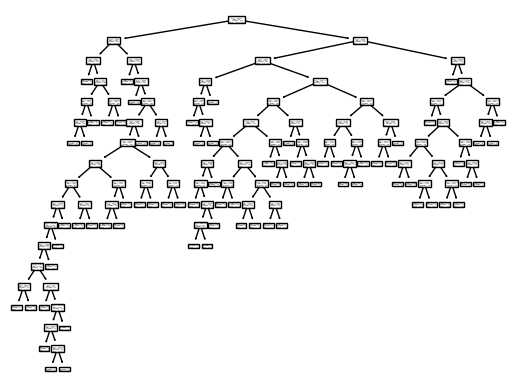

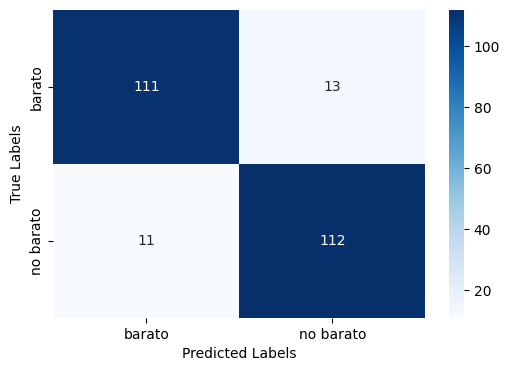

ROC AUC: 0.97


ValueError: y_true takes value in {'barato', 'no barato'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, roc_curve
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Asumiendo que df ya está definido y contiene tus datos

# Manejo de valores faltantes en atributos numéricos
numeric_features = ['Year', 'Kilometers_Driven', 'Seats']
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

# Convertir el atributo 'Mileage' a string antes de limpiar
df['Mileage'] = df['Mileage'].astype(str)

# Reemplazar cualquier cadena vacía con NaN
df['Mileage'] = df['Mileage'].replace('', np.nan)

# Limpiar el atributo Mileage para que solo tenga números
df['Mileage'] = df['Mileage'].str.replace(r'[^0-9.]', '', regex=True)

# Convertir 'Mileage' a float, forzando los errores a NaN
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

# Rellenar valores faltantes en 'Mileage' con la media
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())

# Convertir valores no numéricos de "New_Price" a NaN y eliminar filas donde "New_Price" es NaN
df['New_Price'] = df['New_Price'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['New_Price'] = pd.to_numeric(df['New_Price'], errors='coerce')
df = df.dropna(subset=['New_Price'])

# Convertir "New_Price" en categorías (barato, no barato)
median_price = df['New_Price'].median()
df['New_Price_Category'] = np.where(df['New_Price'] <= median_price, 'barato', 'no barato')

# Seleccionar solo las características numéricas para X
X = df[numeric_features + ['Mileage']]
y = df['New_Price_Category']
clf = tree.DecisionTreeClassifier(min_samples_leaf = 5, min_samples_split = 5)  
clf = clf.fit(X, y)
tree.plot_tree(clf)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()

# ROC AUC (Binary or One-vs-Rest for multiclass)
if len(clf.classes_) == 2:  # Binary classification
    y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f'ROC AUC: {auc:.2f}')
    
    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()
else:  # Multiclass classification
    y_pred_proba = clf.predict_proba(X_test)  # Get probability for all classes
    y_test_bin = pd.get_dummies(y_test)  # One-hot encode the true labels
    auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr', average='weighted')  # One-vs-Rest (OvR)
    print(f'Multiclass ROC AUC: {auc:.2f}')

ValueError: Input contains NaN

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
